# This Notebook still in progress. Feedback is welcome.

---
`Updated: Tree digraph`

**Note: ** The mathematical descriptions are very precise and often unambiguous. Describing ML algorithms using Linear Algebra, Prob, Statistic  is not the only way to describe ML algorithms. 

![](http://quiz.shwemom.com/wp-content/uploads/2016/02/1-22.jpg)


# Titanic Explotory Data Analysis


---
## Outline:
-   **1. Intoduction** ([completed]())
-  **2. Data Visualization** ([completed]())
-  **3. Feature Engineering** ([completed]())
-  **4. Missing Values Imputation** ([completed]())
-  **5. Data Analysis** (to be extended)
    - 5.1 Categorical Encoding
        - LabelEncoder
        - get_dummy
    - 5.2 Correlation Heatmap
        - seaborn
    - 5.3 Split into training & test sets
    - 5.4 Feature Important
        - Decision Tree
        - RandomForest
        - XGB
        - LGB  
-  **6. Cross Validation & Ensembling** (Coming soon)
    - 6.1 CV
    - 6.2 Ensembling
        - Blending and Bagging
        - Adaptive Boosting
        - C&RT (Decision Tree)
        - RandomForest
        - Gradient Boosting
        - Xgboost
        - LightGBM
    
    - 6.3  Optimal hyperparameters (Coming soon)
        - Grid Search
        - Bayesian
        
    - 6.3 Neural Network Keras
-  **7. Conclusion** 
 


# 1. Introduction

Titanic data is **Binary classification** problem, the goal to win the game is teach machine to classify Dead and Alive.

This script assume a background in basic Linear Algebra, Prob, Statistic. It helps if you know the broad strokes, but the goal of this script is to show you ML algorithms from scratch. 
I will also focus on doing some illustrative data visualizations by Plotly, and walk through popular Machine Learning Techniques. 

1. Blending and Bagging
2. Adaptive Boosting
3. C&RT (Decision Tree)
4. RandomForest
5. Gradient Boosting
    - Xgboost
    - LightGBM
6. Neural Network Keras



## 1.1  Load Packages

In [4]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
%matplotlib inline
import plotly # visualization
import plotly.tools as tls # visualization
import plotly.plotly as py # visualization
from plotly.graph_objs import Scatter, Figure, Layout # visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot # visualization
import plotly.figure_factory as ff # visualization
import plotly.graph_objs as go # visualization
init_notebook_mode(connected=True) # visualization
import missingno as msno # visualization

from sklearn.preprocessing import LabelEncoder 
from sklearn.cross_validation import KFold
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix # Metric 
# Ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import xgboost as xgb # Gradeint Boosting
from xgboost import XGBClassifier # Gradeint Boosting
import lightgbm as lgb # Gradeint Boosting
import catboost as cat  # Gradeint Boosting

import warnings
warnings.filterwarnings("ignore")

### Load input data

In [5]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

combine = pd.concat([train.drop('Survived',1),test])

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Data Visualization

## 2.1 Do Nobles are easier to survive ?/貴族真的比較容易活下去嗎？
- From the film Titanic, we knew The First class/The Nobility have first priority to take the lifeboat.
- In other word, poor have little chance to take the lifeboat.
- 從電影，貴族具有絕對優先權搭乘救生筏，沒錢的閃邊去，是真的嗎？
- Let's find out.

![](http://media2.intoday.in/indiatoday/images/stories//2017April/titanic4-mos_042017035113.jpg)

In [9]:
class1_s = len(train[(train['Pclass']==1) & (train['Survived']==1)])
class1_d = len(train[(train['Pclass']==1) & (train['Survived']==0)])
class2_s = len(train[(train['Pclass']==2) & (train['Survived']==1)])
class2_d = len(train[(train['Pclass']==2) & (train['Survived']==0)])
class3_s = len(train[(train['Pclass']==3) & (train['Survived']==1)])
class3_d = len(train[(train['Pclass']==3) & (train['Survived']==0)])

trace1 = go.Bar(
    x=['First Class', 'Bussiness Class', 'Economy Class'],
    y=[class1_s , class2_s , class2_s],
    name='Survive')

trace2 = go.Bar(
    x=['First Class', 'Bussiness Class', 'Economy Class'],
    y=[class1_d , class2_d , class2_d],
    name='Be with God',
    marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5)))
data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    yaxis = dict(zeroline = False, title='Counts'))
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='grouped-bar')

In [10]:
fig = {
  "data": [
    {
      "values": [class1_s ,class2_s ,class3_s],
      "labels": ['Noble Class', 'Bussiness Class', 'Poor Class'],
      "domain": {"x": [0, .48]},
      "name": "Survived",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      'marker': {'colors': ['rgb(58,200,225)','rgb(129, 180, 179)']},
      "type": "pie"
    },     
    {
      "values": [class1_d ,class2_d ,class3_d],
      "labels": ['Noble Class', 'Bussiness Class', 'Poor Class'],
      "text":"Be with God",
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "In Heaven",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Titanic Survival/Dead Ratio",
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Alive",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Dead",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
plotly.offline.iplot(fig, filename='donut')

From Pie plot, over 2/3 people died who are poor
- As **Donald Trump** says he doesn't want a 'poor person'


 ## 2.2 When the death comes, the lady is given priority ? 


In [13]:
c1_y = len(train[(train['Sex']=='female')&(train['Age']<=18)& (train['Survived']==1)])
c1_a = len(train[(train['Sex']=='female')&((train['Age']>=18)&(train['Age']<45))& (train['Survived']==1)])
c1_e = len(train[(train['Sex']=='female')&(train['Age']>=45)& (train['Survived']==1)])

c2_y = len(train[(train['Sex']=='male')&(train['Age']<=18)& (train['Survived']==1)])
c2_a = len(train[(train['Sex']=='male')&((train['Age']>=18)&(train['Age']<45))& (train['Survived']==1)])
c2_e = len(train[(train['Sex']=='male')&(train['Age']>=45)& (train['Survived']==1)])


trace1 = go.Bar(
    x=['Young', 'Adult', 'Elder'],
    y=[c1_y, c1_a, c1_e],
    name='Female',
    marker=dict(
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        )
)
trace2 = go.Bar(
    x=['Young', 'Adult', 'Elder'],
    y=[c2_y, c2_a, c2_e],
    name='Male',
    marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        )
)

data = [trace1, trace2]
layout = go.Layout(
    title = 'Titanic Suvival Gender Ratio',
    barmode='stack',
    yaxis = dict(title='Counts')
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='stacked-bar')


Wow! There were no people similiar to Donal Trump in Titanic, even they struggled to survive.

"_We elected our oldest president ever, and he tweets like a kindergartner._"  
said **13-year-old** Ethan Sonneborn, a gubernatorial candidate in Vermont. "

## 2.3 The more you paid, the easier to survive?


In [14]:

trace0 = go.Scatter(
    y = train[(train['Survived']==1)]['Fare'].values,
    x = train[(train['Survived']==1)]['Age'].values,
    name = 'Survived',
    mode = 'markers',
    marker = dict(
        size = 8,
        color = 'rgb(58,200,225)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    y = train[(train['Survived']==0)]['Fare'].values,
    x = train[(train['Survived']==0)]['Age'].values,
    name = 'Dead',
    mode = 'markers',
    marker = dict(
        size = 6,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Styled Scatter of Fare Vs Age',
              yaxis = dict(zeroline = False, title='Fare'),
              xaxis = dict(zeroline = False, title='Age')
             )

fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig, filename='styled-scatter')


Reality is always cruel, from this plot, we know the important rule: **Money makes the world go round**.

In [15]:
train[train['Pclass']==3][['Fare']].max()

Fare    69.55
dtype: float64

In [16]:
print('The survival Rate when Fare over 70$ is :',round(train[(train['Fare']>=70)&(train['Survived']==1)].shape[0]/train[(train['Fare']>=70)].shape[0],5)*100,'%')

The survival Rate when Fare over 70$ is : 72.381 %


# 3 Feature Engineer

#### This Feature Extraction refer to [Megan L. Risdal](https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic).
Thanks :-)
## 3.1 Title Extraction

In [24]:
# Create a new feature Title
combine['Title'] = combine.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
combine.groupby(['Sex'])['Title'].value_counts()

Sex     Title   
female  Miss        260
        Mrs         197
        Mlle          2
        Ms            2
        Countess      1
        Dona          1
        Dr            1
        Lady          1
        Mme           1
male    Mr          757
        Master       61
        Rev           8
        Dr            7
        Col           4
        Major         2
        Capt          1
        Don           1
        Jonkheer      1
        Sir           1
Name: Title, dtype: int64

In [25]:
combine['Title'] = combine['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                             'Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                             'Jonkheer', 'Dona'], 'Rare')

combine['Title'] = combine['Title'].replace('Mlle', 'Miss')
combine['Title'] = combine['Title'].replace('Ms', 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')
    

In [26]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                         'Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                         'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [27]:
# Gives the length of the name, exclude Title
combine['Name_length'] = combine['Name'].apply(len) - combine['Title'].apply(len)

- Let's Dive deeper to visualze it.

In [28]:
trace1 = go.Bar(
    x=['Master', 'Miss', 'Mr', 'Mrs', 'Rare'],
    y=train[train['Survived']==1][['Title', 'Survived']].groupby(['Title']).size(),
    name='Survived',
    marker = dict(
        color = 'rgba(255, 182, 193, .9)',
    )
)
trace2 = go.Bar(
    x=['Master', 'Miss', 'Mr', 'Mrs', 'Rare'],
    y=train[train['Survived']==0][['Title', 'Survived']].groupby(['Title']).size(),
    name='Dead',
    marker = dict(
        color = 'rgb(255, 0, 0)',
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    yaxis = dict(zeroline = False, title='Count')
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='stacked-bar')

- Obviously, Miss, Mr and Mrs these three titles play an important rule, and may help to improve accuracy.

### Survival rate for those Lucky Name refer to  [Anthony](https://www.kaggle.com/antgoldbloom/lucky-names)'s amazing research

In [29]:
combine['FirstName'] = combine['Name'].str.extract('(Mr\. |Miss\. |Master. |Mrs\.[A-Za-z ]*\()([A-Za-z]*)')[1]

In [30]:
combine['LuckyElizabeth'] = np.where((combine['FirstName']=='Elizabeth'),1,0)
combine['LuckyAnna'] = np.where((combine['FirstName']=='Anna'),1,0)
combine['LuckyMary'] = np.where((combine['FirstName']=='Mary'),1,0)

## 3.2 Family Size


In [31]:
combine['Family'] = combine["Parch"] + combine["SibSp"]
train['Family'] = train["Parch"] + train["SibSp"]

```
combine.drop(["Parch","SibSp"], axis=1, inplace=True)
# equal to
combine = combine.drop(["Parch","SibSp"], axis=1)```
Let’s plot the training data, to help us understand how it may relate to survival and dead, 

In [32]:
trace1 = go.Bar(
    x=train[train['Survived']==1][['Family', 'Survived']].groupby(['Family']).size().index,
    y=train[train['Survived']==1][['Family', 'Survived']].groupby(['Family']).size(),
    name='Survived',
    marker = dict(
        color = 'rgba(255, 182, 193, .9)',
    )
)
trace2 = go.Bar(
    x=train[train['Survived']==0][['Family', 'Survived']].groupby(['Family']).size().index,
    y=train[train['Survived']==0][['Family', 'Survived']].groupby(['Family']).size(),
    name='Dead',
    marker = dict(
        color = 'rgb(255, 0, 0)',
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    yaxis = dict(zeroline = False, title='Count'),
    xaxis = dict(zeroline = False, title='Family Size',dtick=1)
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='stacked-bar')

In [33]:
for i in np.sort(train['Family'].unique()):
    print('Has died, Male (Family Size: {}) proportion: {}'.format(i,
      round(train[(train['Sex']=='male')&(train['Survived']==0)&(train['Family']==i)].shape[0]/\
          train[(train['Survived']==0)&(train['Family']==i)].shape[0]*100,2)),'%')

Has died, Male (Family Size: 0) proportion: 92.78 %
Has died, Male (Family Size: 1) proportion: 77.78 %
Has died, Male (Family Size: 2) proportion: 74.42 %
Has died, Male (Family Size: 3) proportion: 62.5 %
Has died, Male (Family Size: 4) proportion: 25.0 %
Has died, Male (Family Size: 5) proportion: 73.68 %
Has died, Male (Family Size: 6) proportion: 37.5 %
Has died, Male (Family Size: 7) proportion: 66.67 %
Has died, Male (Family Size: 10) proportion: 57.14 %


Not cristal clear, but still could  show something intersting.

1. Single has big death rate.
2. Big size family prefer being in Heaven together.
 
**Let’s create a quantiled family size feature.**

In [34]:
combine['Alone'] = 0
combine.ix[combine['Family'] == 0, 'Alone'] = 1
combine.ix[combine.Family==0,'Fsize'] = 'Single'
combine.ix[(combine.Family>0)&(combine.Family<5),'Fsize'] = 'small'
combine.ix[(combine.Family>4),'Fsize'] = 'big'

### How old are those Single people ?

In [37]:
x = combine[(combine['Alone']==1)][['Age']].round().dropna().groupby(['Age']).size() 
trace0 = go.Scatter(
    x = x.index,
    y = x,
    mode = 'lines',
    name = 'lines',
    marker = dict(
        color = 'rgba(255, 182, 193, .9)',
    )
)
data = [trace0]
plotly.offline.iplot(data, filename='line-mode')

- Most young people has American dream because the great unrest in Britain during 1911-1914, make them leave British. (Maybe)

# 4 Missing Values Imputation
It is very common in real-world that data can have missing values for a number of reasons such as observations that were not recorded, human error, data corruption.

Handling missing data is important as many machine learning algorithms do not support data with missing values.


In [38]:
combine.isnull().sum()

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                263
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin             1014
Embarked             2
Title                0
Name_length          0
FirstName           38
LuckyElizabeth       0
LuckyAnna            0
LuckyMary            0
Family               0
Alone                0
Fsize                0
dtype: int64

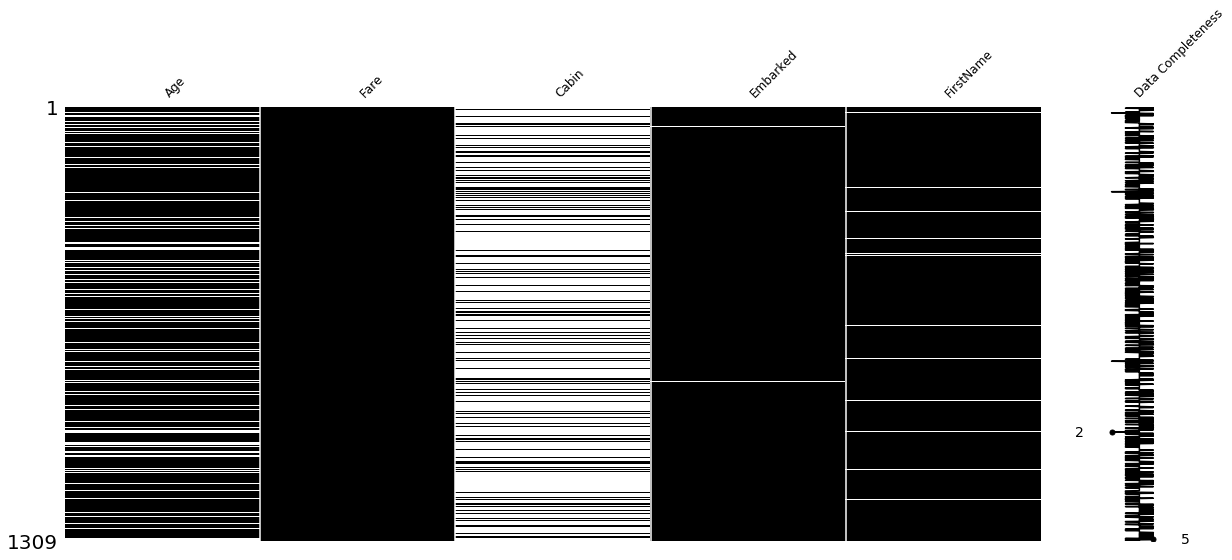

In [39]:
# Using msno library to see the NaN distribution
missingValueColumns = combine.columns[combine.isnull().any()].tolist()
msno.matrix(combine[missingValueColumns],width_ratios=(10,1),\
            figsize=(20,8),color=(0,0, 0),fontsize=12,sparkline=True,labels=True)
plt.show()

#### There are no obviously NaN in common.

## 4.1 Handle Fare Missing Value

```
combine[combine['Fare'].isnull()]['Fsize'],
combine[combine['Fare'].isnull()]['Age'],
combine[combine['Fare'].isnull()]['Sex']
combine[combine['Fare'].isnull()]['Embarked']
combine[combine['Fare'].isnull()]['Pclass']
```
- He's a **single** 60.5 years-old **male**, embarked at **S**, lived in Pclass 3.
- Under this condition, try to find the Fare range.

In [40]:
combine[(combine['Embarked']=='S')&(combine['Sex']=='male')&(combine['Pclass']==3)&
        (combine['Age']>60)&(combine['Fsize']=='Single')][['Fare']].describe()

,Fare
count,2.000000
mean,7.006250
std,1.087177
min,6.237500
25%,6.621875
50%,7.006250
75%,7.390625
max,7.775000


- We could reasonable fill the Fare NaN with median value **7.775** and  use `fillna()` method in Panda's Dataframe to fill missing values

In [41]:
combine['Fare'].fillna(7.775, inplace=True)

## 4.2 Handle Embarked Missing Value

```
combine[combine['Embarked'].isnull()]['Fsize'],
combine[combine['Embarked'].isnull()]['Age'],
combine[combine['Embarked'].isnull()]['Sex'],
combine[combine['Embarked'].isnull()]['Pclass'],
combine[combine['Embarked'].isnull()]['Fare'],
combine[combine['Embarked'].isnull()][['Title']]
```
- Two single **women** aged 38, 62 with Title **Miss, Mrs**, respectly, and both lived in **Noble Class** paid the same **Fare** 80.
- Recall **in[9]: ** Fare Over 70 get very high suvival rate

In [42]:
# Remember that must relax the condition to find the values
combine[(combine['Fare']>70)&(combine['Sex']=='female')&(combine['Pclass']==1)].groupby(['Embarked']).size()

Embarked
C    47
Q     2
S    40
dtype: int64

- Under the condition, we got two possible values
    - How to choose ? **C** or **S**
    - Should we cast the dice ? 
    - No more clue ?

### History
- Titanic leaves the dock at **Southhampton** for its maiden voyage. First stop is in **Cherbourg**, France, where the Titanic arrives at 6:30 p.m. and leaves at 8:10 p.m, heading to **Queenstown**, Ireland (now known as Cobh).

**C = Cherbourg, Q = Queenstown, S = Southampton**

In [43]:
combine[combine['Embarked'].isnull()][['Name']]

,Name
61,"Icard, Miss. Amelie"
829,"Stone, Mrs. George Nelson (Martha Evelyn)"


- Big Suprise, Amelie a French feminine given name, instead of casting the dice or filling with median, I'd like to fill Icard, Miss. Amelie's ___Embarked___  with **C**.

    1. C is the most frequent value.
    2. Given name is highly relevant to French.

    
 - In order to prove it, we check the people's name who left the deck at **C**


In [44]:
combine[combine['Embarked']=='C'][['Name']].head(10)
# Yes, almost French name

,Name
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
9,"Nasser, Mrs. Nicholas (Adele Achem)"
19,"Masselmani, Mrs. Fatima"
26,"Emir, Mr. Farred Chehab"
30,"Uruchurtu, Don. Manuel E"
31,"Spencer, Mrs. William Augustus (Marie Eugenie)"
34,"Meyer, Mr. Edgar Joseph"
36,"Mamee, Mr. Hanna"
39,"Nicola-Yarred, Miss. Jamila"
42,"Kraeff, Mr. Theodor"


In [45]:
c = combine[(combine['Embarked']=='C')&(combine['Pclass']==1)]['Fare']
q = combine[(combine['Embarked']=='Q')&(combine['Pclass']==1)]['Fare']
s = combine[(combine['Embarked']=='S')&(combine['Pclass']==1)]['Fare']

trace0 = go.Box(
    y=c,
    name = 'C',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=q,
    name = 'Q',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=s,
    name = 'S',
    marker = dict(
        color = 'rgb(107,174,214)',
    )
)
data = [trace0, trace1,trace2 ]
plotly.offline.iplot(data)

- The median fare for a 1st class who departing from Charbourg coincides is $76.72, we have more confident replace the NaN with C.

In [46]:
combine['Embarked'].fillna('C', inplace=True)

## 4.3 Handle Age Missing Value
- Over 20 % Missing, we cant do analysis one by one

`combine['Age'].isnull().sum()/combine.shape[0]`

### Statistic Note:
- The Age Statstic of Single **_Female_** who took the **First Class**: 

|      | count | mean      | std       | min  | 25%   | 50%  | 75%  | max  |
| ---- | ----- | --------- | --------- | ---- | ----- | ---- | ---- | ---- |
| Age  | 48.0  | 36.416667 | 11.646995 | 16.0 | 29.75 | 35.0 | 42.5 | 62.0 |

- The Age Statstic of Single **_Feale_**  who took the **Third Class**: 

|      | count | mean     | std      | min  | 25%  | 50%  | 75%  | max  |
| ---- | ----- | -------- | -------- | ---- | ---- | ---- | ---- | ---- |
| Age  | 64.0  | 24.09375 | 8.821814 | 5.0  | 18.0 | 22.0 | 28.0 | 63.0 |

- The Age Statstic of Single **_Male_** who took the **First Class**: 

|      | count | mean     | std       | min  | 25%    | 50%  | 75%   | max  |
| ---- | ----- | -------- | --------- | ---- | ------ | ---- | ----- | ---- |
| Age  | 80.0  | 42.93125 | 12.871011 | 17.0 | 32.875 | 42.0 | 50.25 | 80.0 |

- The Age Statstic of Single **_Male_** who took the **Third Class**: 

|      | count | mean      | std       | min  | 25%  | 50%  | 75%    | max  |
| ---- | ----- | --------- | --------- | ---- | ---- | ---- | ------ | ---- |
| Age  | 256.0 | 28.486328 | 10.012581 | 11.0 | 21.0 | 26.0 | 32.625 | 74.0 |

### Important Note:
- In Tatanic Rich People are older than low income  people by 12 years. (mean value)
- Low income people look for new dream in America.
- The rich youngest still older than the low income youngest, no matter male or femal.


In [47]:
# Fill NaN for First Class single male/female
combine.ix[(combine['Age'].isnull())&(combine['Pclass']==1)&(combine['Sex']=='female'),'Age'] = 35
combine.ix[(combine['Age'].isnull())&(combine['Pclass']==1)&(combine['Sex']=='male'),'Age'] = 42

# Fill NaN for Second Class single male/female
combine.ix[(combine['Age'].isnull())&(combine['Pclass']==2)&(combine['Sex']=='female'),'Age'] = 30
combine.ix[(combine['Age'].isnull())&(combine['Pclass']==2)&(combine['Sex']=='male'),'Age'] = 30

# Fill NaN for Third Class single male/female
combine.ix[(combine['Age'].isnull())&(combine['Pclass']==3)&(combine['Sex']=='female'),'Age'] = 22
combine.ix[(combine['Age'].isnull())&(combine['Pclass']==3)&(combine['Sex']=='male'),'Age'] = 26

if combine['Age'].isnull().sum() == 0:
    print('Done, Age Missing Value accomplished!! 乁( ◔ ౪◔)「')

Done, Age Missing Value accomplished!! 乁( ◔ ౪◔)「


## 4.4 Handle Cabin Missing Value
- Over 70 % Missing


In [48]:
# Let's see the Cabin Number
combine['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

From external data [Cabin Allocations](https://www.encyclopedia-titanica.org/cabins.html)

1. __A - E : First Class__
2. __D - F : Second Class__
3. __F - G : Third Class__

We also can prove the external data by checking kaggle titanic dataset.
```
combine[combine['Pclass']==1]['Cabin'].str.extract('(^.{0,1})', expand=False).unique()
combine[combine['Pclass']==2]['Cabin'].str.extract('(^.{0,1})', expand=False).unique()
combine[combine['Pclass']==3]['Cabin'].str.extract('(^.{0,1})', expand=False).unique()
```

In [49]:
combine[combine['Cabin'].isnull()][['Pclass']].groupby(['Pclass']).size()

Pclass
1     67
2    254
3    693
dtype: int64

- 67 First Class people without Cabin information.
- 254 Second Class without Cabin information.
- 693 Poor Class  without Cabin information.

### My Strategy is impute the NaN depend on what Plcass they live, by using
`np.random.choice`


In [50]:
combine.ix[(combine.Pclass==1)&(combine.Cabin.isnull()),'Cabin'] = np.random.choice(['A','B','C','D'])
combine.ix[(combine.Pclass==2)&(combine.Cabin.isnull()),'Cabin'] = np.random.choice(['D','E','F'])
combine.ix[(combine.Pclass==3)&(combine.Cabin.isnull()),'Cabin'] = np.random.choice(['E','F','G'])

if combine['Cabin'].isnull().sum() == 0:
    print('Beautiful, no more Cabin NaN. ლ(＾ω＾ლ)')

Beautiful, no more Cabin NaN. ლ(＾ω＾ლ)


In [51]:
combine['Cabin_Lv'] = combine.Cabin.str.extract('(^.{0,1})', expand=False)
combine['Cabin_Lv'].unique()
# Beautiful no more NaN

array(['E', 'C', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

# 5 Data Analysis

## 5.1 Categorical Encoding

__Q__: What's categorical ?
__A__: Not numeric

Real-world datasets usually contain categorical features. 
When we are talking about categorical data, further distinguish between nominal and ordinal features. 
Ordinal features can be understood as categorical values that can be sorted or ordered.
We can use the __LabelEncoder__ in __scikit-learn__ to help us encode categorical values into numerical values.

Here we have some Nominal  variables like Embarked, Title, in Geometric space,  you can't exactly tell the Hyperdimension distance between **Nominal Feature**.
If you try to  include these in your model, you'll need to make binary dummy variables. 
An alternative way is simple to do with Pandas thanks to `get_dummies()`.


How do I  find categorical column names ?

`pandas.DataFrame.select_dtypes`

In [55]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 21 columns):
PassengerId       1309 non-null int64
Pclass            1309 non-null int64
Name              1309 non-null object
Sex               1309 non-null object
Age               1309 non-null float64
SibSp             1309 non-null int64
Parch             1309 non-null int64
Ticket            1309 non-null object
Fare              1309 non-null float64
Cabin             1309 non-null object
Embarked          1309 non-null object
Title             1309 non-null object
Name_length       1309 non-null int64
FirstName         1271 non-null object
LuckyElizabeth    1309 non-null int64
LuckyAnna         1309 non-null int64
LuckyMary         1309 non-null int64
Family            1309 non-null int64
Alone             1309 non-null int64
Fsize             1309 non-null object
Cabin_Lv          1309 non-null object
dtypes: float64(2), int64(10), object(9)
memory usage: 265.0+ KB


In [56]:
# Check categorical column names
combine.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title', 'FirstName',
       'Fsize', 'Cabin_Lv'],
      dtype='object')

In [59]:
combine.drop(['Name','Ticket','Cabin', 'SibSp', 'Parch','FirstName'], axis = 1, inplace = True)

# encode categorical features
catego_features = ['Sex', 'Embarked', 'Title', 'Fsize', 'Cabin_Lv']
catego_le = LabelEncoder()

for i in catego_features:
    combine[i] = catego_le.fit_transform(combine[i])

ValueError: labels ['Name' 'Ticket' 'Cabin' 'SibSp' 'Parch' 'FirstName'] not contained in axis

In [60]:
combine.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Name_length,LuckyElizabeth,LuckyAnna,LuckyMary,Family,Alone,Fsize,Cabin_Lv
0,1,3,1,22.0,7.2500,2,2,21,0,0,0,1,0,2,4
1,2,1,0,38.0,71.2833,0,3,48,0,0,0,1,0,2,2
2,3,3,0,26.0,7.9250,2,1,18,0,0,0,0,1,0,4
3,4,1,0,35.0,53.1000,2,3,41,0,0,0,1,0,2,2
4,5,3,1,35.0,8.0500,2,2,22,0,0,0,0,1,0,4


## 5.2 Correlation Heatmap

let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows

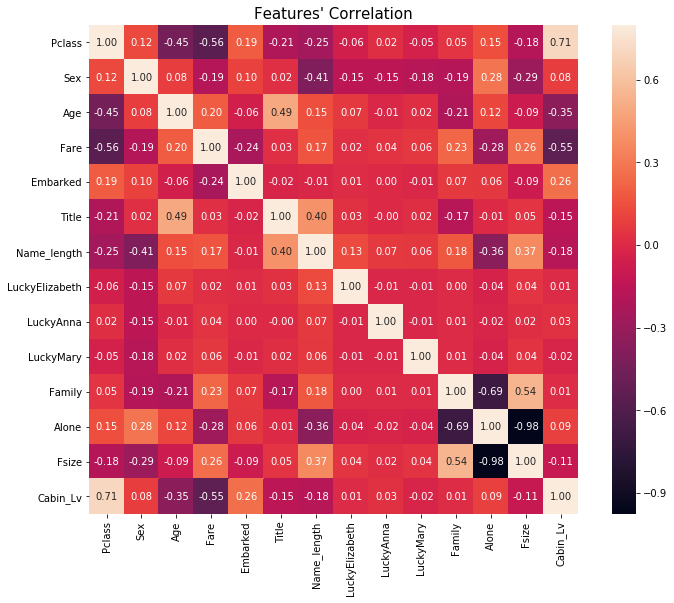

In [61]:
corrmat = combine.drop('PassengerId',axis=1).corr()
f, ax = plt.subplots(figsize=(12, 9))
plt.title("Features' Correlation",size=15)
sns.heatmap(corrmat, cbar=True, annot=True, square=True, vmax=.8, fmt='.2f');

## 5.3 Split into training & test sets

In [62]:
train_df = combine.iloc[:train.shape[0],:]
train_df['Survived'] = train['Survived']
test_df = combine.iloc[train.shape[0]: ,:]

In [63]:
train_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Name_length,LuckyElizabeth,LuckyAnna,LuckyMary,Family,Alone,Fsize,Cabin_Lv,Survived
0,1,3,1,22.0,7.2500,2,2,21,0,0,0,1,0,2,4,0
1,2,1,0,38.0,71.2833,0,3,48,0,0,0,1,0,2,2,1
2,3,3,0,26.0,7.9250,2,1,18,0,0,0,0,1,0,4,1
3,4,1,0,35.0,53.1000,2,3,41,0,0,0,1,0,2,2,1
4,5,3,1,35.0,8.0500,2,2,22,0,0,0,0,1,0,4,0


In [64]:
X = train_df.drop(['PassengerId','Survived','Alone'], axis=1)
y = train_df.Survived.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

## 5.4 Feature Important

- __Decision Tree Classifier__

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

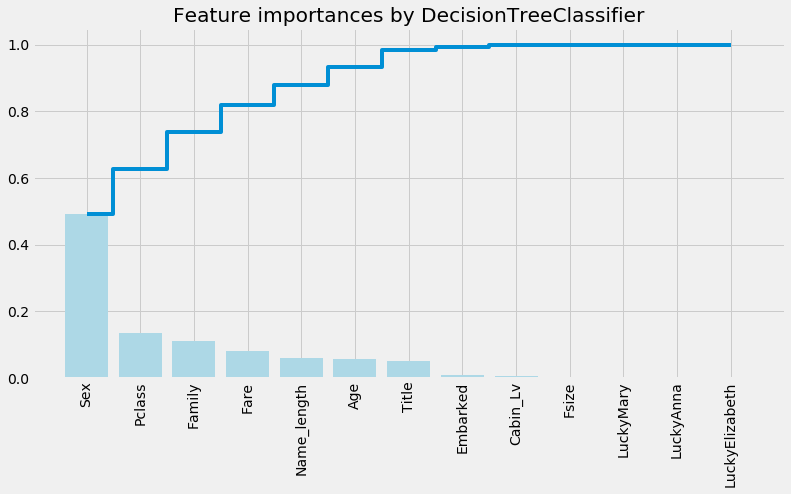

In [65]:
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = (12,6)
model = DecisionTreeClassifier(max_depth=6 ,random_state=87)
model.fit(X, y)
feat_names = X.columns.values
## plot the importances ##
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

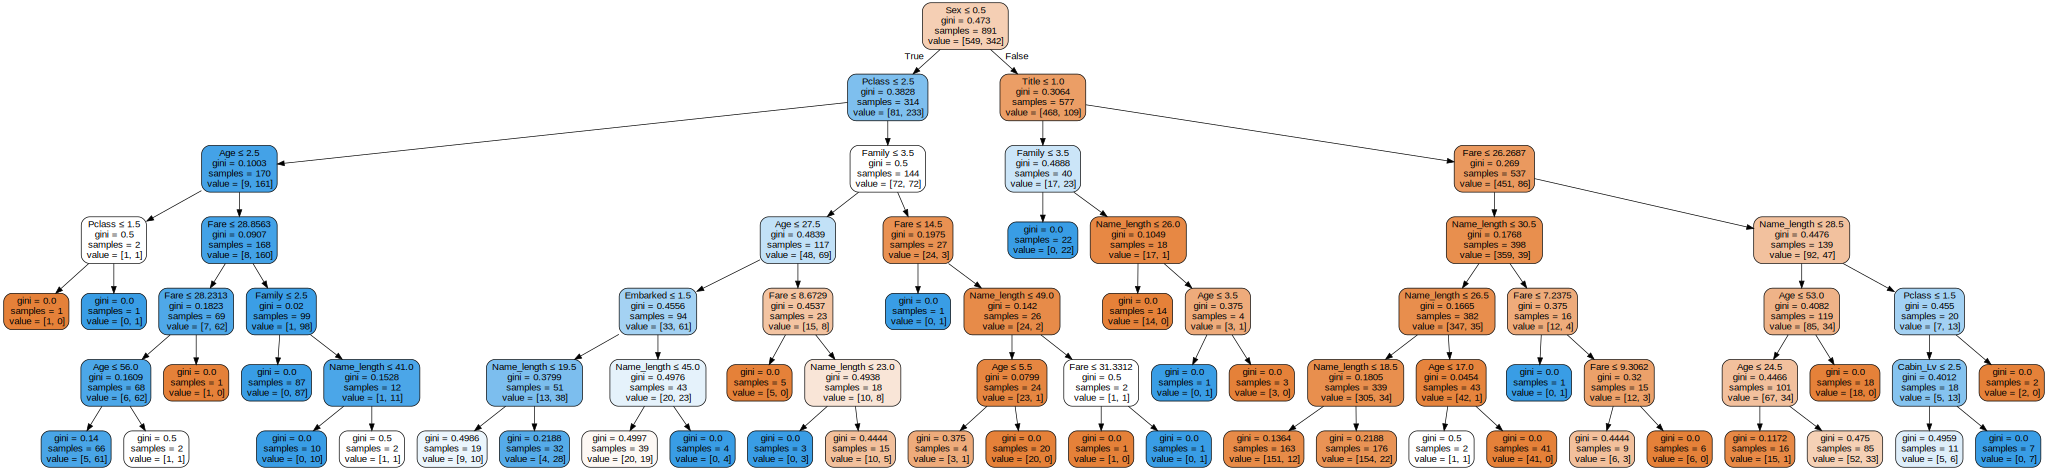

In [66]:
from sklearn.tree import export_graphviz
import graphviz
treegraph = export_graphviz(model, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(treegraph)  
graph

- __RandomForest Classifier__

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. 

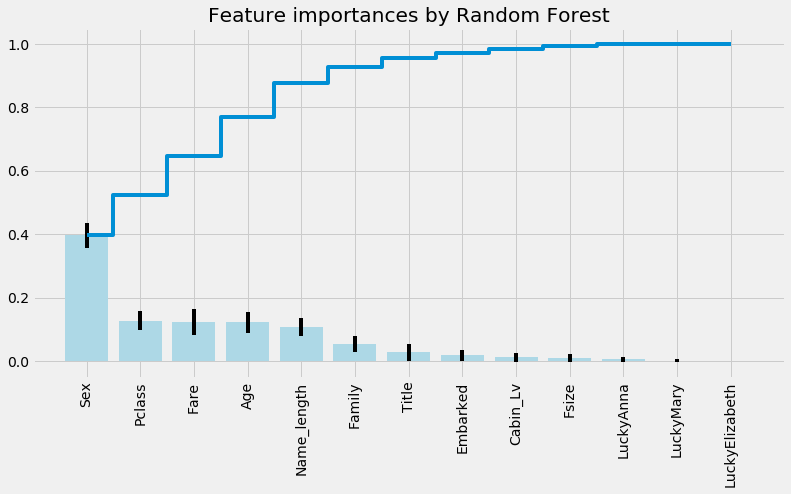

In [67]:
model = RandomForestClassifier(n_estimators = 100 ,max_depth=8, max_features=None,
                               min_samples_split = 4,min_samples_leaf=2,random_state=87)
model.fit(X, y)
feat_names = X.columns.values
## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature importances by Random Forest")
plt.bar(range(len(indices)), importances[indices], color='lightblue', yerr=std[indices], align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

- __XGB Classifier__

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework

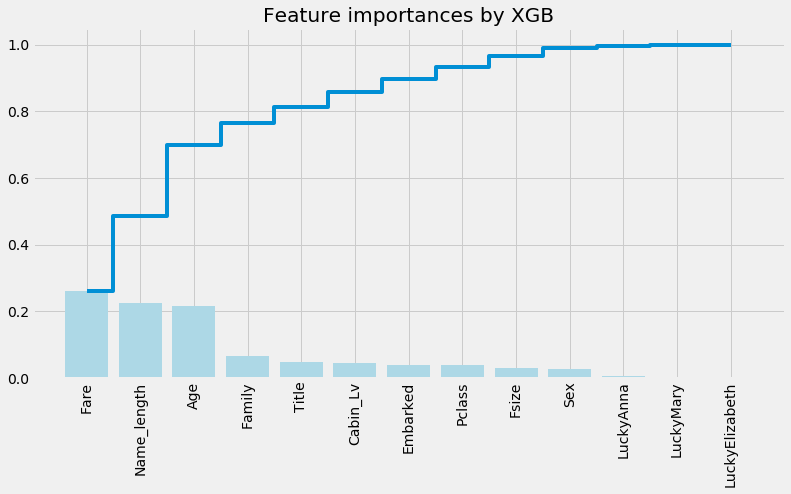

In [68]:
model = XGBClassifier(eta = 0.05, max_depth = 7, subsample = 0.8, colsample_bytree= 0.4,
                     num_iterations= 7000, max_leaves=4)
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by XGB") # Thanks Oscar Takeshita's kindly remind
plt.bar(range(len(indices)), importances[indices], color='lightblue', align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

### Create Tree digraph by using
`xgb.to_graphviz`

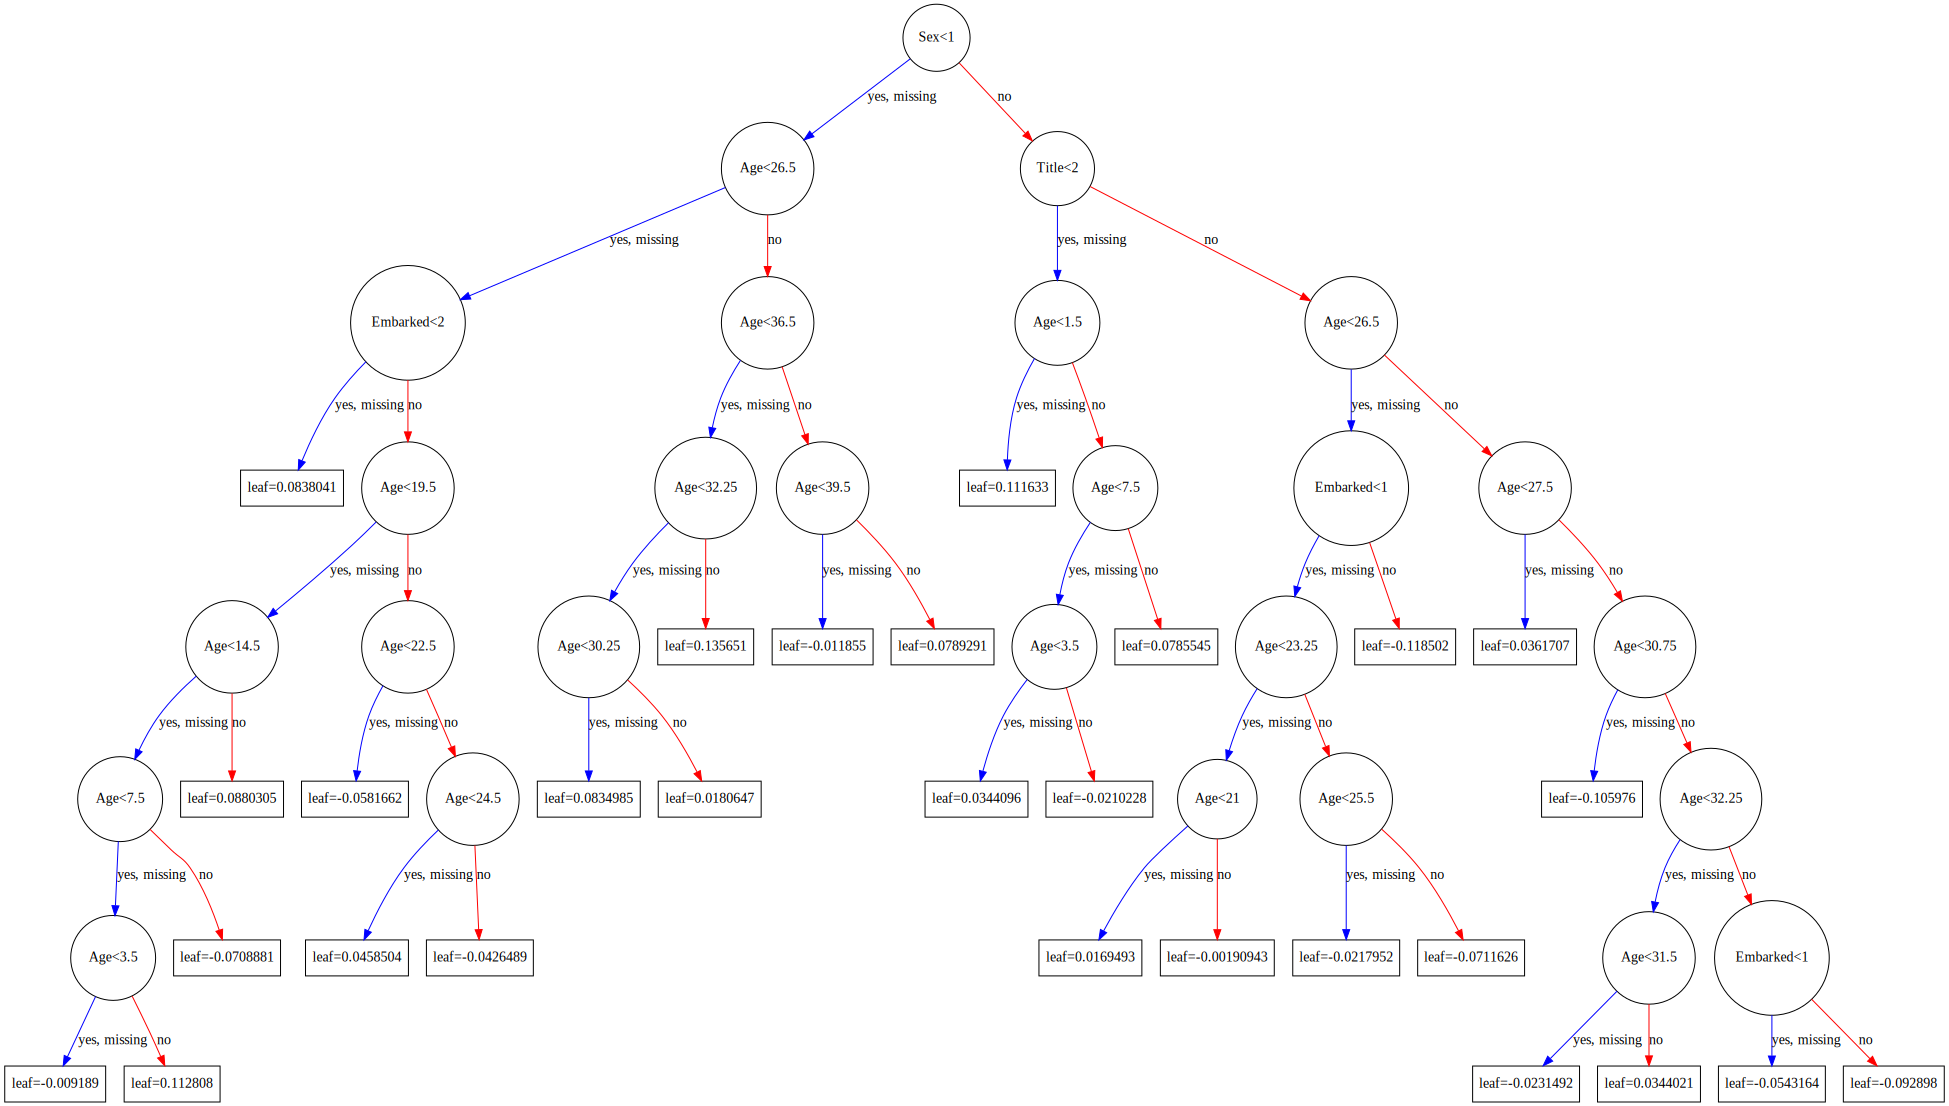

In [69]:
xgb.to_graphviz(model, fmap='', rankdir='UT', num_trees=6,
                yes_color='#0000FF', no_color='#FF0000')

- __LightGBM  Classifier__

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages

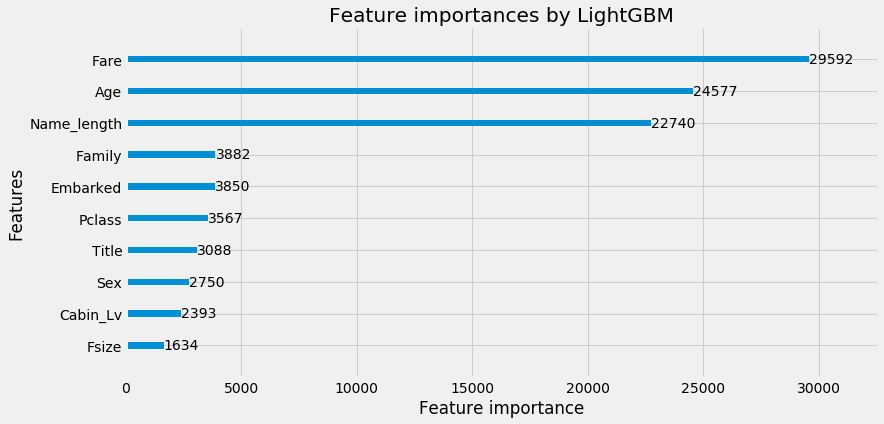

In [70]:
lgb_params = {}
lgb_params['objective'] = 'binary'
lgb_params['metric'] = 'auc'
lgb_params['sub_feature'] = 0.80 
lgb_params['max_depth'] = 8
lgb_params['feature_fraction'] = 0.7
lgb_params['bagging_fraction'] = 0.7
lgb_params['bagging_freq'] = 10
lgb_params['learning_rate'] = 0.01
lgb_params['num_iterations'] = 5000

lgb_train = lgb.Dataset(X, y)
lightgbm = lgb.train(lgb_params, lgb_train)

lgb.plot_importance(lightgbm)
plt.title("Feature importances by LightGBM")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

### Create Tree digraph using
`create_tree_digraph`


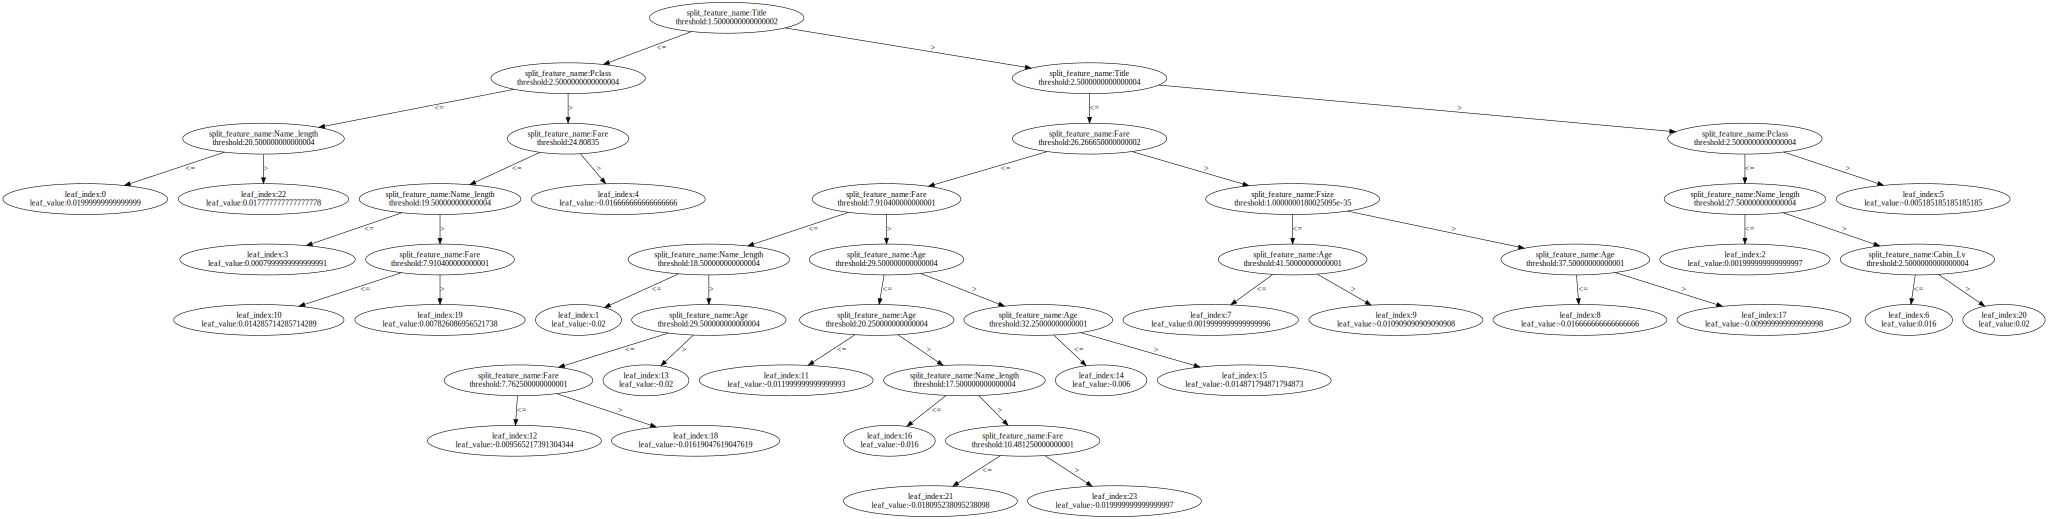

In [71]:
lgb.create_tree_digraph(lightgbm)

- Contradiction

    1. Gender should be important, also.

- The important features from __whole dataset__ are total different than stack method refer to [Anisotropic](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)
    1. From [Faron's](https://www.kaggle.com/mmueller/allstate-claims-severity/stacking-starter/run/390867) script, he did k-fold training, and I just use entire dataset.



## New content coming Soon

# Acknowledgements
1. [Oscar Takeshita](https://www.kaggle.com/pliptor) for pointing my XGB feature importance typo.